<a href="https://colab.research.google.com/github/joezerr/Project/blob/main/KNN_%26_SVM_UAS_Machine_Learning_No_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT LIBRARY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

**Import datasets**

In [ ]:
url = ("https://raw.githubusercontent.com/joezerr/UASMachineLearning/main/experiment.csv")

**Getting to know the datasets (Data exploration)**

In [ ]:
no3 = pd.read_csv(url, sep=";",decimal=',')
no3

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F192,F193,F194,F195,F196,F197,F198,F199,F200,Class
0,0.006711,0.000000,0.013423,0.006711,0.0,0.006711,0.006711,0.020134,0.020134,0.000000,...,0.013423,0.000000,0.006711,0.013423,0.020134,0.006711,0.000000,0.006711,0.000000,1
1,0.000000,0.000000,0.000000,0.007246,0.0,0.000000,0.000000,0.021739,0.014493,0.000000,...,0.007246,0.007246,0.000000,0.000000,0.014493,0.000000,0.000000,0.007246,0.000000,1
2,0.011696,0.000000,0.005848,0.000000,0.0,0.005848,0.000000,0.035088,0.017544,0.017544,...,0.005848,0.000000,0.005848,0.011696,0.035088,0.005848,0.000000,0.000000,0.000000,1
3,0.000000,0.000000,0.020833,0.000000,0.0,0.000000,0.010417,0.000000,0.020833,0.000000,...,0.010417,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,1
4,0.000000,0.000000,0.034483,0.000000,0.0,0.000000,0.000000,0.000000,0.034483,0.000000,...,0.017241,0.000000,0.000000,0.068966,0.000000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4075,0.000000,0.016667,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016667,0.000000,0.033333,5
4076,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017857,0.000000,0.035714,5
4077,0.014925,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.014925,0.000000,0.000000,0.000000,0.000000,0.000000,0.014925,0.000000,0.029851,5
4078,0.000000,0.017544,0.017544,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.017544,0.000000,0.000000,0.000000,0.000000,0.000000,0.017544,0.000000,0.035088,5


In [ ]:
no3 = no3.astype(float)

In [ ]:
no3['Class'] = no3['Class'].astype(int)
no3

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F192,F193,F194,F195,F196,F197,F198,F199,F200,Class
0,0.006711,0.000000,0.013423,0.006711,0.0,0.006711,0.006711,0.020134,0.020134,0.000000,...,0.013423,0.000000,0.006711,0.013423,0.020134,0.006711,0.000000,0.006711,0.000000,1
1,0.000000,0.000000,0.000000,0.007246,0.0,0.000000,0.000000,0.021739,0.014493,0.000000,...,0.007246,0.007246,0.000000,0.000000,0.014493,0.000000,0.000000,0.007246,0.000000,1
2,0.011696,0.000000,0.005848,0.000000,0.0,0.005848,0.000000,0.035088,0.017544,0.017544,...,0.005848,0.000000,0.005848,0.011696,0.035088,0.005848,0.000000,0.000000,0.000000,1
3,0.000000,0.000000,0.020833,0.000000,0.0,0.000000,0.010417,0.000000,0.020833,0.000000,...,0.010417,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,1
4,0.000000,0.000000,0.034483,0.000000,0.0,0.000000,0.000000,0.000000,0.034483,0.000000,...,0.017241,0.000000,0.000000,0.068966,0.000000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4075,0.000000,0.016667,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016667,0.000000,0.033333,5
4076,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017857,0.000000,0.035714,5
4077,0.014925,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.014925,0.000000,0.000000,0.000000,0.000000,0.000000,0.014925,0.000000,0.029851,5
4078,0.000000,0.017544,0.017544,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.017544,0.000000,0.000000,0.000000,0.000000,0.000000,0.017544,0.000000,0.035088,5


In [ ]:
no3.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F192,F193,F194,F195,F196,F197,F198,F199,F200,Class
count,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,...,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000
mean,0.007245,0.005094,0.003749,0.004814,0.004394,0.004664,0.004318,0.009327,0.004394,0.003458,...,0.004131,0.003731,0.004545,0.004980,0.004471,0.003831,0.003890,0.004026,0.004319,3.000000
std,0.012460,0.008867,0.008527,0.008642,0.008072,0.009278,0.007984,0.013402,0.009775,0.007367,...,0.009224,0.007468,0.008130,0.009218,0.008929,0.007681,0.007581,0.007857,0.008777,1.414387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,0.012500,0.009901,0.000000,0.009009,0.008282,0.007874,0.008000,0.016393,0.000000,0.000000,...,0.006944,0.000000,0.008621,0.008942,0.007143,0.005723,0.006499,0.006909,0.005579,4.000000
max,0.136364,0.076923,0.150000,0.100000,0.058824,0.103448,0.071429,0.094595,0.136364,0.142857,...,0.250000,0.071429,0.064516,0.120000,0.058824,0.125000,0.075000,0.050000,0.064103,5.000000


In [ ]:
no3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Columns: 201 entries, F1 to Class
dtypes: float64(200), int64(1)
memory usage: 6.3 MB


**A. DATA VISUALIZATION**

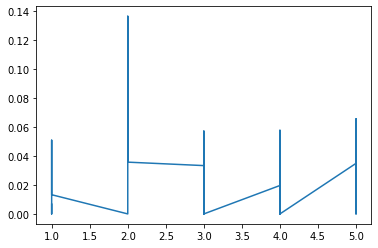

In [ ]:
plt.plot(no3['Class'], no3['F1'], label='a')


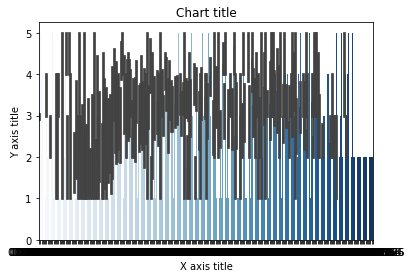

In [ ]:
sns.barplot(x = 'F1',y = 'Class',data = no3,palette = "Blues")
#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 
# Show the plot
plt.show()

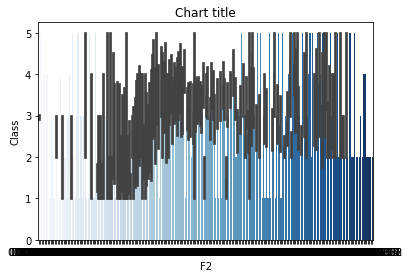

In [ ]:
sns.barplot(x = 'F2',y = 'Class',data = no3,palette = "Blues")
#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('F2')
plt.ylabel('Class') 
# Show the plot
plt.show()

Dari visualisasi diatas, didapatkan bahwa terdapat 5 jenis Class (Topeng) dan 200 attributes dengan nilai class yang berkisar dari 1 - 5

Dataset ini merupakan jenis multivariate classification problem

***B. DATA PREPROCESSING***

In [ ]:
X = no3.drop('Class', axis=1)
y = no3.Class

In [ ]:
#split the dataset into  training and testing data
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=12345)

**STANDARD SCALER**

Karena terdapat range nilai raw data yang beragam, kita perlu menormalisasi nya supaya model machine learning dapat bekerja. Jikalau ada satu fitur yang mempunyai range luas, maka distance akan didominasi oleh satu fitur tersebut. Makanya, penting untuk menormalisasi semua fitur secara proporsional

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**UNIVARIATE FEATURE SELECTION**

Univariate feature selection dilakukan untuk memilih the best features berdasarkan univariate statistical test. Hal ini dilakukan supaya hanya fitur-fitur yang berkolerasi lah yang tersisa sehingga menghasilkan model yang baik

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# fit train set
k_best = SelectKBest(score_func=f_classif, k=100)
# transform train set
fit = k_best.fit(X_train, y_train)
univariate_features = fit.transform(X_train)

In [ ]:
univariate_features

array([[-0.58448208, -0.44533059, -0.45285396, ..., -0.49188419,
        -0.51313552, -0.49262455],
       [-0.58448208, -0.44533059, -0.45285396, ..., -0.49188419,
         0.71177482, -0.49262455],
       [-0.58448208, -0.44533059,  0.61950019, ..., -0.49188419,
        -0.51313552, -0.49262455],
       ...,
       [ 1.35324668, -0.44533059, -0.45285396, ..., -0.49188419,
        -0.51313552, -0.49262455],
       [-0.58448208,  1.20783103, -0.45285396, ..., -0.49188419,
        -0.51313552, -0.49262455],
       [ 0.06142751, -0.44533059,  0.10119573, ..., -0.49188419,
        -0.51313552,  0.13797972]])

**OUTLIER DETECTION**

Menurut saya, outlier tidak terlalu mempengaruhi model ini dikarenakan sample size yang terdapat pada dataset ini besar dan tidak terdapat extreme values pada variables. Maka dari itu, saya tidak akan menghapus outlier

**DATA CLEANING**

Data cleaning dilakukan untuk memastikan bahwa semua data tidak ada yang kosong atau misinputted

In [ ]:
no3.isnull().sum()

F1       0
F2       0
F3       0
F4       0
F5       0
        ..
F197     0
F198     0
F199     0
F200     0
Class    0
Length: 201, dtype: int64

In [ ]:
no3.isnull().values.any()

False

In [ ]:
no3.isnull().sum().sum()

0

Didapati bahwa tidak ada data yang kosong

In [ ]:
no3.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F192,F193,F194,F195,F196,F197,F198,F199,F200,Class
count,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,...,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000
mean,0.007245,0.005094,0.003749,0.004814,0.004394,0.004664,0.004318,0.009327,0.004394,0.003458,...,0.004131,0.003731,0.004545,0.004980,0.004471,0.003831,0.003890,0.004026,0.004319,3.000000
std,0.012460,0.008867,0.008527,0.008642,0.008072,0.009278,0.007984,0.013402,0.009775,0.007367,...,0.009224,0.007468,0.008130,0.009218,0.008929,0.007681,0.007581,0.007857,0.008777,1.414387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,0.012500,0.009901,0.000000,0.009009,0.008282,0.007874,0.008000,0.016393,0.000000,0.000000,...,0.006944,0.000000,0.008621,0.008942,0.007143,0.005723,0.006499,0.006909,0.005579,4.000000
max,0.136364,0.076923,0.150000,0.100000,0.058824,0.103448,0.071429,0.094595,0.136364,0.142857,...,0.250000,0.071429,0.064516,0.120000,0.058824,0.125000,0.075000,0.050000,0.064103,5.000000


In [ ]:
no3

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F192,F193,F194,F195,F196,F197,F198,F199,F200,Class
0,0.006711,0.000000,0.013423,0.006711,0.0,0.006711,0.006711,0.020134,0.020134,0.000000,...,0.013423,0.000000,0.006711,0.013423,0.020134,0.006711,0.000000,0.006711,0.000000,1
1,0.000000,0.000000,0.000000,0.007246,0.0,0.000000,0.000000,0.021739,0.014493,0.000000,...,0.007246,0.007246,0.000000,0.000000,0.014493,0.000000,0.000000,0.007246,0.000000,1
2,0.011696,0.000000,0.005848,0.000000,0.0,0.005848,0.000000,0.035088,0.017544,0.017544,...,0.005848,0.000000,0.005848,0.011696,0.035088,0.005848,0.000000,0.000000,0.000000,1
3,0.000000,0.000000,0.020833,0.000000,0.0,0.000000,0.010417,0.000000,0.020833,0.000000,...,0.010417,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,1
4,0.000000,0.000000,0.034483,0.000000,0.0,0.000000,0.000000,0.000000,0.034483,0.000000,...,0.017241,0.000000,0.000000,0.068966,0.000000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4075,0.000000,0.016667,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016667,0.000000,0.033333,5
4076,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017857,0.000000,0.035714,5
4077,0.014925,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.014925,0.000000,0.000000,0.000000,0.000000,0.000000,0.014925,0.000000,0.029851,5
4078,0.000000,0.017544,0.017544,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.017544,0.000000,0.000000,0.000000,0.000000,0.000000,0.017544,0.000000,0.035088,5


**C. METODE MACHINE LEARNING KLASIFIKASI**

Metode machine learning untuk klasifikasi yang akan dipakai adalah *KNN* dan *Support Vector Machine*. Alasan pemilihan penggunaan *KNN* adalah *KNN* merupakan algoritma klasifikasi yang simple namun sangat kuat. *KNN* tidak memerlukan training untuk membuat prediksi, yang mana merupakan salah satu bagian sulit buat kebanyakan algoritma machine learning. *KNN* juga digunakan dalam tahap preprocessing untuk computer vision. 

Sedangkan untuk *Support Vector Machine*, algoritma ini digunakan karena *SVM* adalah salah satu algoritma paling robust dan akurat diantara algortima klasifikasi lain. Secara umum, *SVM* mempunyai performa yang sangat bagus dan cocok digunakan ketika kita mempunyai banyak sekali fitur seperti yang terdapat pada dataset "*experiment.csv*"


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#set number of neighbour to default (5)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
#predict 
y_pred = knn_model.predict(X_test)

In [ ]:
#print confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

NameError: ignored

didapatkan akurasi yang bagus sekitar 0.90

*Mencari optimum K*

Kita dapat meningkatkan akurasi dari model *KNN* yang telah ada dengan menggunakan K yang paling optimum

optimum k digunakan untuk mendapatkan accuracy terbaik

In [ ]:
error = []

#hitung nilai error untuk interasi dari 1 sampai 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

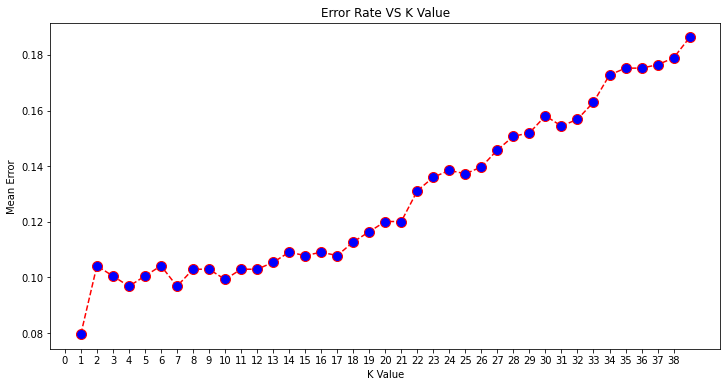

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate VS K Value')
plt.xticks(np.arange(0, len(error), 1.0))
plt.xlabel('K Value')
plt.ylabel('Mean Error')

didapatkan k value optimum dengan error terkecil didapatkan pada k = 1. Selanjutnya, kita akan menggunakan k = 1 untuk retrain model

**Retrain**

*retrain model dengan menggunakan optimum k*

In [ ]:
# optimum k = 1
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train,y_train)
y_pred_KNN = knn_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
#print confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_KNN))
print(classification_report(y_test, y_pred_KNN))

[[152   1   0   1   3]
 [  4 161   7   6   2]
 [  3   5 149   2   2]
 [  4   2   3 149   0]
 [  7   6   4   3 140]]
              precision    recall  f1-score   support

           1       0.89      0.97      0.93       157
           2       0.92      0.89      0.91       180
           3       0.91      0.93      0.92       161
           4       0.93      0.94      0.93       158
           5       0.95      0.88      0.91       160

    accuracy                           0.92       816
   macro avg       0.92      0.92      0.92       816
weighted avg       0.92      0.92      0.92       816



didapatkan hasil akurasi yang lebih baik dengan k = 1 yaitu sebesar 0.92

**SUPPORT VECTOR MACHINE (SVM)**

algoritma kedua yang akan digunakan untuk klasifikasi adalah Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svc = SVC()
#fit model
svc.fit(X_train, y_train)
#predict
y_pred_SVM = svc.predict(X_test)

In [ ]:
#print confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_SVM))
print(classification_report(y_test, y_pred_SVM))

[[150   4   2   0   1]
 [  2 165   7   3   3]
 [  0   9 147   2   3]
 [  0   6   5 146   1]
 [  4   5   1   0 150]]
              precision    recall  f1-score   support

           1       0.96      0.96      0.96       157
           2       0.87      0.92      0.89       180
           3       0.91      0.91      0.91       161
           4       0.97      0.92      0.94       158
           5       0.95      0.94      0.94       160

    accuracy                           0.93       816
   macro avg       0.93      0.93      0.93       816
weighted avg       0.93      0.93      0.93       816



didapatkan hasil akurasi yang bagus sebesar 0.93

**D. Evaluasi & Komparasi**

***Evaluasi***:

Secara keseluruhan, baik metode algoritma KNN maupun Support Vector Machine telah menghasilkan tingkat akurasi yang bagus, presisi yang tepat sehingga memprediksi hasil positives yang memang adalah "True Positives". Bila dilihat dari confusion matrix, kedua model mampu sering menghasilkan "True Positives" dan jarang menghasilkan "False Positives" maupun "False Negatives"

***Komparasi***



Komparasi Confusion Matrix

In [ ]:
#print confusion matrix and classification report for KNN
print("Confusion matrix for KNN")
print(confusion_matrix(y_test, y_pred_KNN))
print("\n")
print("Confusion matrix for SVM")
print(confusion_matrix(y_test, y_pred_SVM))


Confusion matrix for KNN
[[152   1   0   1   3]
 [  4 161   7   6   2]
 [  3   5 149   2   2]
 [  4   2   3 149   0]
 [  7   6   4   3 140]]


Confusion matrix for SVM
[[150   4   2   0   1]
 [  2 165   7   3   3]
 [  0   9 147   2   3]
 [  0   6   5 146   1]
 [  4   5   1   0 150]]


Kedua model mampu menghasilkan "True Positives" yang serupa dan jarang menghasilkan "False Positives" maupun "False Negatives"

Komparasi Classification Report

In [ ]:
#Compare classification report for KNN & SVM

print("Classification report for KNN")
print(classification_report(y_test, y_pred_KNN))
print("\n")
print("Classification report for SVM")
print(classification_report(y_test, y_pred_SVM))


Classification report for KNN
              precision    recall  f1-score   support

           1       0.89      0.97      0.93       157
           2       0.92      0.89      0.91       180
           3       0.91      0.93      0.92       161
           4       0.93      0.94      0.93       158
           5       0.95      0.88      0.91       160

    accuracy                           0.92       816
   macro avg       0.92      0.92      0.92       816
weighted avg       0.92      0.92      0.92       816



Classification report for SVM
              precision    recall  f1-score   support

           1       0.96      0.96      0.96       157
           2       0.87      0.92      0.89       180
           3       0.91      0.91      0.91       161
           4       0.97      0.92      0.94       158
           5       0.95      0.94      0.94       160

    accuracy                           0.93       816
   macro avg       0.93      0.93      0.93       816
weighted avg   

Kedua model menghasilkan hasil klasifikasi yang serupa, namun score accuracy, macro avg, dan weighted avg model SVM mempunyai hasil yang lebih tinggi (0.93) dibandingkan dengan hasil KNN (0.92)